# Assignment 1

#### Name: Salim M'jahad 
#### UNI: msm2243

---

## Problem 1

> We have $\frac{dx}{dt} = -3t^2x , x(0)=1$

> We separate the variables: $\frac{1}{x}dx = -3t^2dt$

> We have $\int \frac{1}{x}dx = ln(|x|) + C_1 $ and $\int -3t^2dt = -t^3 + C_2 $

> So $ln(|x|) + C = -t^3$

> From initial conditions $x$ is positive and $C = - ln(1) = 0$

> So $x(t) = e^{-t^3}$

## Problem 2

### a. 

> $C_m = c_m \cdot A = 0.25 \space nF$


### b. 
> $R_m = \frac{r_m}{A} = 40 \space M\Omega$ 
### c. 
> $\tau_m = r_m \cdot c_m = 10^6 \space \Omega \cdot mm^2 \cdot 10^{-8} F/mm^2 = 0.01 \space s$
###d. 
> We know that $\tau_m \frac{dV}{dt} = E - V + R_m I_e$

>  At equilibrium ($t_\inf$) $\frac{dV}{dt} = 0$

> so $I_e = \frac{V-E}{R_m} = \frac{5 \cdot10^{-3}V}{40\cdot10^6\Omega}=0.125 \space nA$

###e.
> Let $t=0$ such that $V{t} = V{0} = E$

> Let $\Delta t$ be the time difference such that $V(t + \Delta t) = V(\Delta t) = -67 \space mA$

> $V(\Delta t) = E + R_mI_e + (V(0) - E - R_mT_e)\cdot e^{\frac{\Delta t}{\tau}}$

> $V(\Delta t) = R_mI_e(1 -  e^{\frac{\Delta t}{\tau}})$

> $\Delta t = -\tau ln(1 -  \frac{V(\Delta t) - E}{R_mI_e})$

> $\Delta t = - 0.01 \space s \cdot ln(1- \frac{3 \cdot 10^{-3} \cdot V}{5 \cdot 10^{-3} \cdot V}) = 9.16 \cdot 10^{-3} \space s $

## Problem 3

### Integrate-and-Fire Model


In [0]:
import numpy as np
import matplotlib.pyplot as plt

class Neuron:
  def __init__(self, V_rest=-65, V_reset=-65, V_th=-50, tau_m=10, R_m=10):
    """
    Input is given in mV, mV, mV, ms, M Ohm respectively 
    Converted and stored in V, V, V, s, Ohm
    """
    self.V_rest = V_rest/1000.0 # V
    self.V_reset = V_reset/1000.0 # V
    self.V_th = V_th/1000.0 # V
    self.tau_m = tau_m/1000.0 # s
    self.R_m = R_m*(10.0**6) # Ohm 
    self.delta_t = 0.2*self.tau_m # we want (delta_t / tau_m) < 1 

  def integrate_and_fire(self, V_zero, I_e, duration):
    duration /= 1000.0 # convert from ms to s 
    I_e *= 10.0**(-9) # convert I_e from nano Ampere to Ampere
    V_zero /= 1000.0 # convert V_zero from mV to V
    V_inf = self.V_rest + self.R_m*I_e
    delta_t_over_tau = self.delta_t/self.tau_m
    steps = int(duration/self.delta_t)
    potentials = np.zeros(steps)
    potentials[0] = V_zero
    action_potential_count = 0
    dur = 0
    for i in range(1, steps):
      potentials[i] = V_inf + (potentials[i-1] - V_inf)*np.exp(-delta_t_over_tau)
      # print(np.exp(-delta_t_over_tau))
      # print(potentials[i], self.V_th, potentials[i] >= self.V_th)
      if potentials[i] >= self.V_th:
        potentials[i] = self.V_reset
        action_potential_count += 1
        dur = i*self.delta_t
    rate = 0 if dur==0 else action_potential_count/dur
    return [potentials*1000.0, rate] # convert back to mV

### Action Potential Rate Analytic Formula

In [0]:
def rate_formula(I_e, V_rest=-65/1000.0, V_reset=-65/1000.0, V_th=-50/1000.0, tau_m=10/1000.0, R_m=10*(10.0**6)):
  I_e *= 10.0**(-9)
  V_inf = V_rest + R_m*I_e
  tmp = V_inf-V_th
  return 0 if tmp==0 else 1.0/(tau_m*np.log((V_inf-V_reset)/tmp))

Action potential rate for I_e = 1.5 is r = 0 spike / second -- (0 using formula)
Action potential rate for I_e = 1.51 is r = 19.23076923076923 spike / second -- (19.931118704250444 using formula)
Action potential rate for I_e = 1.7 is r = 45.45454545454545 spike / second -- (46.72752726328235 using formula)
Action potential rate for I_e = 2.0 is r = 71.42857142857143 spike / second -- (72.1347520444482 using formula)


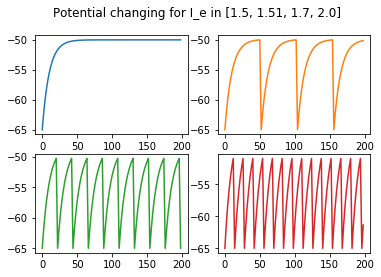

In [0]:
neuron = Neuron()

I_vals = [1.5, 1.51, 1.7, 2.0] 

plots = []
rates = []
for I_e in I_vals:
  tmp_plot, tmp_rate = neuron.integrate_and_fire(V_zero=-65, I_e=I_e, duration=200)
  plots.append(tmp_plot)
  rates.append(tmp_rate)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Potential changing for I_e in {}'.format(I_vals))
index = range(0,200,2)
ax1.plot(index, plots[0])
ax2.plot(index, plots[1],'tab:orange')
ax3.plot(index, plots[2],'tab:green')
ax4.plot(index, plots[3],'tab:red')
fig.show()

for idx, rate in enumerate(rates):
  print('Action potential rate for I_e = {} is r = {} spike / second -- ({} using formula)'.format(I_vals[idx], rate, rate_formula(I_vals[idx])))